## Import Libraries

In [1]:
!pip install statsmodels
!pip install seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
%matplotlib inline

import os
import h5py
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import random

from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import check_random_state
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import metrics
from skimage import exposure
from scipy import ndimage

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator

import helper_functions as hlp
import function_model_definition as md
import function_read_data as rdat

print("TF  Version",tf.__version__)

TF  Version 2.4.0


In [3]:
# tf.config.experimental.get_memory_usage("GPU:0")

## Load Data & Model


In [4]:
# Define the path + output path:
print(os.getcwd())
DIR = "/tf/notebooks/"
DATA_DIR = "/tf/notebooks/brdd/xAI_3d/data/"
OUTPUT_DIR = "/tf/notebooks/brdd/xAI_3d/weights/10Fold/"


/tf/notebooks/brdd/xAI_3d


In [5]:
id_tab = pd.read_csv(DATA_DIR + "10Fold_ids.csv", sep=",")
X = np.load(DATA_DIR + "prepocessed_dicom_3d.npy")

print(id_tab.shape)
print(X.shape)

(407, 14)
(407, 128, 128, 28)


In [6]:
train = False

# Define Model
layer_connection = "globalAveragePooling"
last_activation = "sigmoid"

In [7]:
num_splits = 10
num_models = 5

batch_size = 6
epochs = 250

In [8]:
input_dim = np.expand_dims(X, axis = -1).shape[1:]
output_dim = 1

# call model
model_3d = md.stroke_binary_3d(input_dim = input_dim,
                               output_dim = output_dim,
                               layer_connection = layer_connection,
                               last_activation = last_activation)

model_3d.summary()

Model: "cnn_3d_"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 28, 1)] 0         
_________________________________________________________________
conv3d (Conv3D)              (None, 128, 128, 28, 32)  896       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 64, 64, 14, 32)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 64, 64, 14, 32)    27680     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 32, 32, 7, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 32, 32, 7, 64)     55360     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 16, 16, 3, 64)     0   

In [9]:
def validation_preprocessing(volume, label):
    """Process validation data by only adding a channel."""
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


In [ ]:
test_auc = []
test_nll = []
test_sens = []
test_spez = []





################################################################################
Split 0
################################################################################






#######################################################
Split 0 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 17s 8s/step - loss: 0.5014 - acc: 0.8341 - auc: 0.5853

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.5567
Area under Curve (AUC) Probability : 0.6113
Negative Log-Likelihood : 0.4969


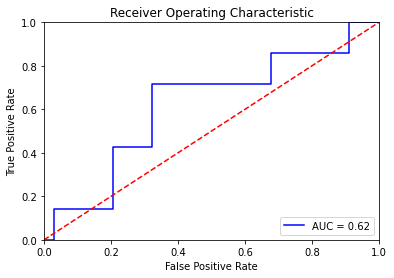

 
Duration of Training: 18.67607879638672


#######################################################
Split 0 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 20ms/step - loss: 0.5003 - acc: 0.8016 - auc: 0.6018

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9118 [0.7704 0.9695]

Area under Curve (AUC) Binary : 0.5273
Area under Curve (AUC) Probability : 0.6008
Negative Log-Likelihood : 0.5135


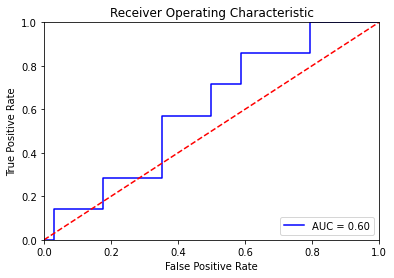

 
Duration of Training: 1.6770973205566406


#######################################################
Split 0 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4628 - acc: 0.8074 - auc: 0.5956

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.6008
Negative Log-Likelihood : 0.4689


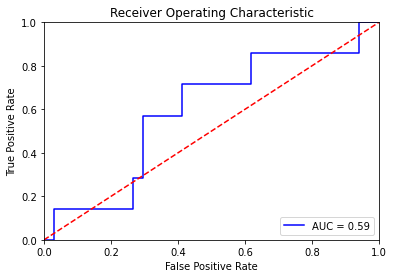

 
Duration of Training: 1.6554834842681885


#######################################################
Split 0 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4679 - acc: 0.8074 - auc: 0.5908

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.6029
Negative Log-Likelihood : 0.4727


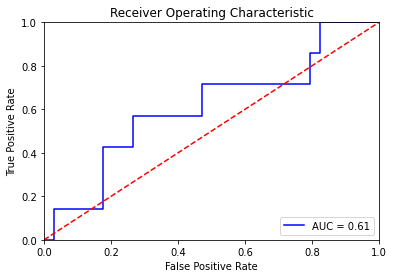

 
Duration of Training: 1.6657180786132812


#######################################################
Split 0 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5095 - acc: 0.8341 - auc: 0.6008

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.5567
Area under Curve (AUC) Probability : 0.6197
Negative Log-Likelihood : 0.5016


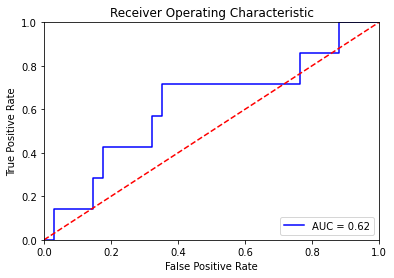

 
Duration of Training: 1.6196072101593018
 
Duration of Split: 25.43683409690857




################################################################################
Split 1
################################################################################






#######################################################
Split 1 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 18ms/step - loss: 0.4818 - acc: 0.8074 - auc: 0.5880

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.5987
Negative Log-Likelihood : 0.4826


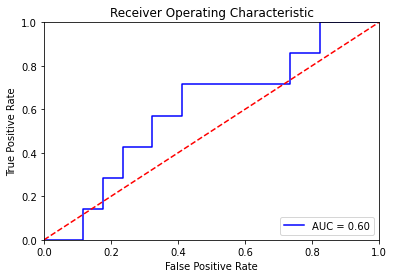

 
Duration of Training: 1.8748281002044678


#######################################################
Split 1 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 18ms/step - loss: 0.5454 - acc: 0.8016 - auc: 0.5890

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9118 [0.7704 0.9695]

Area under Curve (AUC) Binary : 0.5273
Area under Curve (AUC) Probability : 0.5945
Negative Log-Likelihood : 0.5554


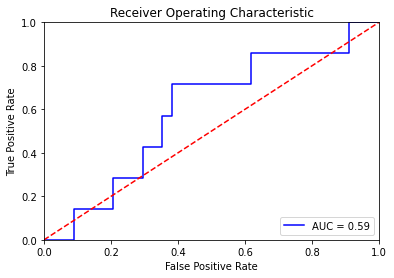

 
Duration of Training: 1.6299316883087158


#######################################################
Split 1 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5378 - acc: 0.8341 - auc: 0.5500

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.5567
Area under Curve (AUC) Probability : 0.5546
Negative Log-Likelihood : 0.539


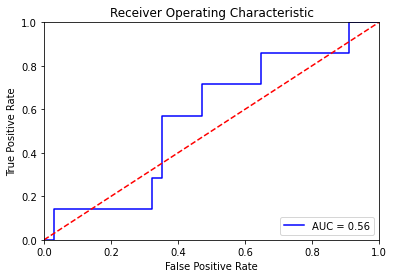

 
Duration of Training: 1.60532546043396


#######################################################
Split 1 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 18ms/step - loss: 0.4808 - acc: 0.8074 - auc: 0.5822

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.6029
Negative Log-Likelihood : 0.4765


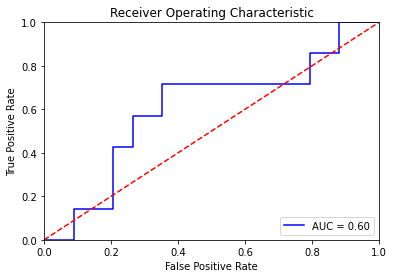

 
Duration of Training: 1.613647222518921


#######################################################
Split 1 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4945 - acc: 0.8178 - auc: 0.6223

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9412 [0.8091 0.9837]

Area under Curve (AUC) Binary : 0.542
Area under Curve (AUC) Probability : 0.6261
Negative Log-Likelihood : 0.5034


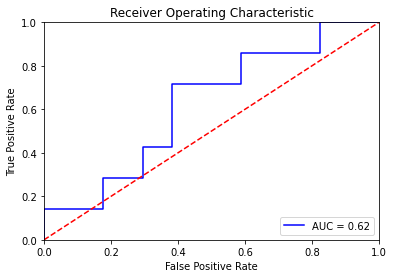

 
Duration of Training: 1.6189634799957275
 
Duration of Split: 8.48555850982666




################################################################################
Split 2
################################################################################






#######################################################
Split 2 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5367 - acc: 0.8341 - auc: 0.5726

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.5567
Area under Curve (AUC) Probability : 0.5903
Negative Log-Likelihood : 0.5322


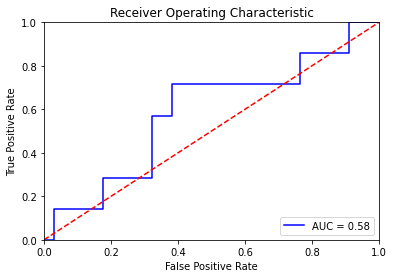

 
Duration of Training: 1.605128526687622


#######################################################
Split 2 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 1s 18ms/step - loss: 0.4735 - acc: 0.8074 - auc: 0.5941

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.5966
Negative Log-Likelihood : 0.4773


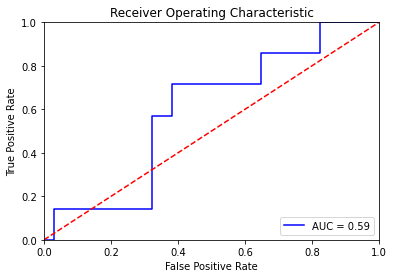

 
Duration of Training: 1.8743963241577148


#######################################################
Split 2 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 20ms/step - loss: 0.5135 - acc: 0.8074 - auc: 0.5567

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9412 [0.8091 0.9837]

Area under Curve (AUC) Binary : 0.542
Area under Curve (AUC) Probability : 0.5609
Negative Log-Likelihood : 0.5136


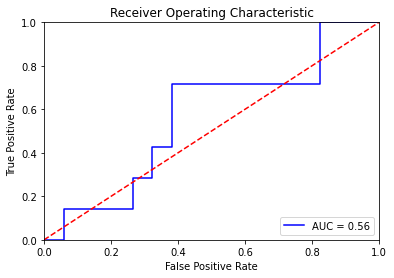

 
Duration of Training: 1.6670637130737305


#######################################################
Split 2 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 18ms/step - loss: 0.5011 - acc: 0.8074 - auc: 0.6154

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.6324
Negative Log-Likelihood : 0.4995


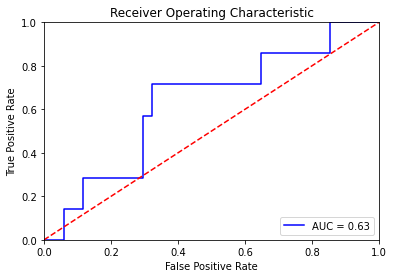

 
Duration of Training: 1.6471850872039795


#######################################################
Split 2 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 18ms/step - loss: 0.5179 - acc: 0.8074 - auc: 0.6368

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.6218
Negative Log-Likelihood : 0.5302


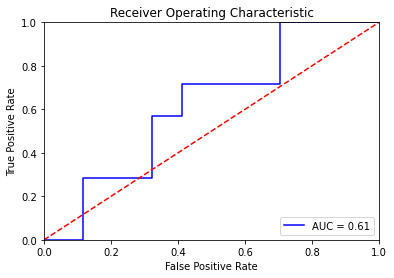

 
Duration of Training: 1.6676251888275146
 
Duration of Split: 8.604633331298828




################################################################################
Split 3
################################################################################






#######################################################
Split 3 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4539 - acc: 0.8074 - auc: 0.6177

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.6303
Negative Log-Likelihood : 0.4577


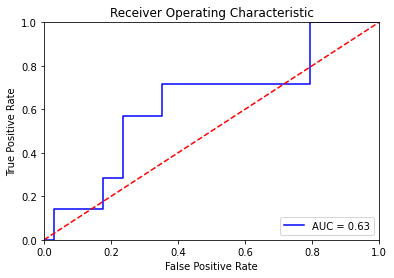

 
Duration of Training: 1.6482062339782715


#######################################################
Split 3 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5382 - acc: 0.8016 - auc: 0.5909

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9118 [0.7704 0.9695]

Area under Curve (AUC) Binary : 0.5273
Area under Curve (AUC) Probability : 0.5882
Negative Log-Likelihood : 0.5517


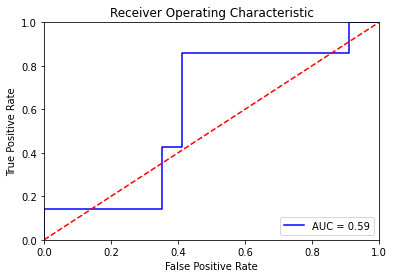

 
Duration of Training: 1.6818437576293945


#######################################################
Split 3 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5310 - acc: 0.7912 - auc: 0.5866

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9118 [0.7704 0.9695]

Area under Curve (AUC) Binary : 0.5273
Area under Curve (AUC) Probability : 0.5966
Negative Log-Likelihood : 0.5286


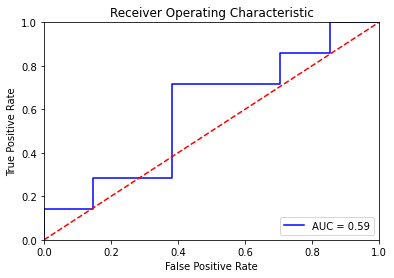

 
Duration of Training: 1.9138977527618408


#######################################################
Split 3 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4959 - acc: 0.7807 - auc: 0.5881

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9412 [0.8091 0.9837]

Area under Curve (AUC) Binary : 0.4706
Area under Curve (AUC) Probability : 0.584
Negative Log-Likelihood : 0.5042


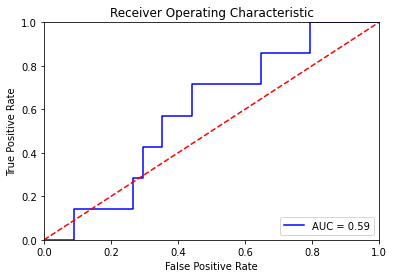

 
Duration of Training: 1.6285476684570312


#######################################################
Split 3 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4880 - acc: 0.8178 - auc: 0.6174

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9412 [0.8091 0.9837]

Area under Curve (AUC) Binary : 0.542
Area under Curve (AUC) Probability : 0.6261
Negative Log-Likelihood : 0.4918


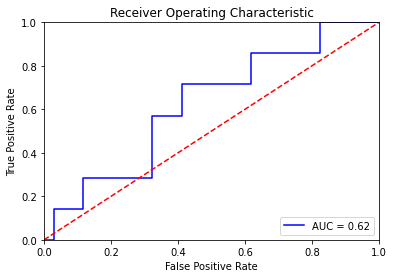

 
Duration of Training: 1.656226396560669
 
Duration of Split: 8.67367696762085




################################################################################
Split 4
################################################################################






#######################################################
Split 4 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5252 - acc: 0.8074 - auc: 0.5498

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9412 [0.8091 0.9837]

Area under Curve (AUC) Binary : 0.542
Area under Curve (AUC) Probability : 0.5525
Negative Log-Likelihood : 0.527


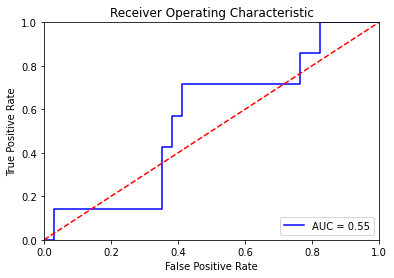

 
Duration of Training: 1.6517703533172607


#######################################################
Split 4 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5506 - acc: 0.8178 - auc: 0.5819

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9412 [0.8091 0.9837]

Area under Curve (AUC) Binary : 0.542
Area under Curve (AUC) Probability : 0.584
Negative Log-Likelihood : 0.5573


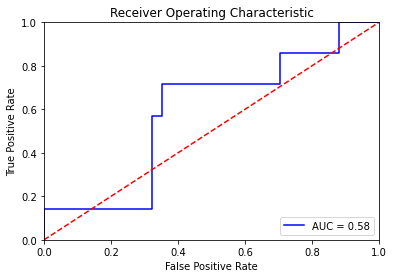

 
Duration of Training: 1.6664338111877441


#######################################################
Split 4 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 20ms/step - loss: 0.4897 - acc: 0.8341 - auc: 0.6042

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.5567
Area under Curve (AUC) Probability : 0.6155
Negative Log-Likelihood : 0.4876


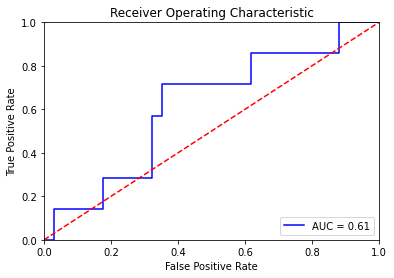

 
Duration of Training: 1.6842918395996094


#######################################################
Split 4 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4606 - acc: 0.8074 - auc: 0.6200

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.6282
Negative Log-Likelihood : 0.4628


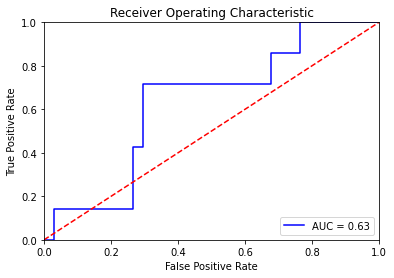

 
Duration of Training: 1.7076358795166016


#######################################################
Split 4 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 1s 19ms/step - loss: 0.4814 - acc: 0.8341 - auc: 0.6644

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.2857 [0.0822 0.6411]
Specificity [95% Conf.] : 0.9412 [0.8091 0.9837]

Area under Curve (AUC) Binary : 0.6134
Area under Curve (AUC) Probability : 0.6744
Negative Log-Likelihood : 0.484


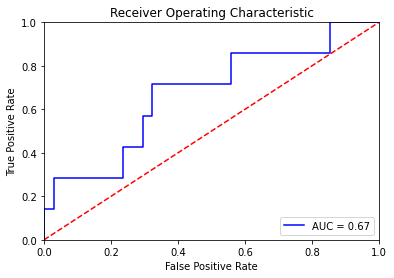

 
Duration of Training: 1.93867826461792
 
Duration of Split: 8.791659355163574




################################################################################
Split 5
################################################################################






#######################################################
Split 5 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 18ms/step - loss: 0.5047 - acc: 0.7482 - auc: 0.6416

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7317 [0.5807 0.8431]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.8824 [0.7338 0.9533]

Area under Curve (AUC) Binary : 0.4412
Area under Curve (AUC) Probability : 0.6513
Negative Log-Likelihood : 0.5158


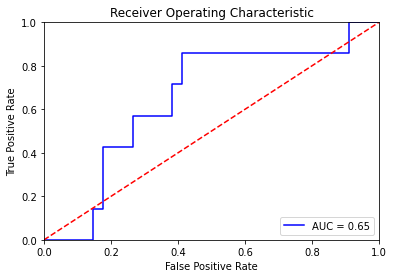

 
Duration of Training: 1.6625041961669922


#######################################################
Split 5 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4820 - acc: 0.8074 - auc: 0.5904

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.5966
Negative Log-Likelihood : 0.486


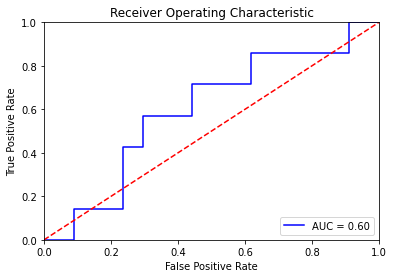

 
Duration of Training: 1.710447072982788


#######################################################
Split 5 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5189 - acc: 0.7749 - auc: 0.5978

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7561 [0.6066 0.8617]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.8824 [0.7338 0.9533]

Area under Curve (AUC) Binary : 0.5126
Area under Curve (AUC) Probability : 0.5966
Negative Log-Likelihood : 0.5307


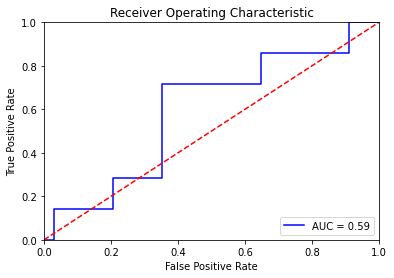

 
Duration of Training: 1.6622447967529297


#######################################################
Split 5 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 18ms/step - loss: 0.5206 - acc: 0.7541 - auc: 0.5777

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7561 [0.6066 0.8617]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9118 [0.7704 0.9695]

Area under Curve (AUC) Binary : 0.4559
Area under Curve (AUC) Probability : 0.5924
Negative Log-Likelihood : 0.5185


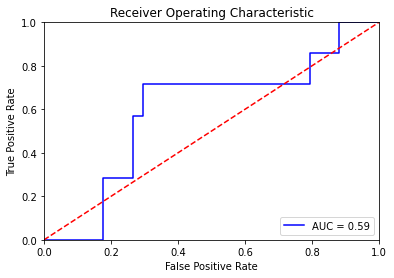

 
Duration of Training: 1.681450605392456


#######################################################
Split 5 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5649 - acc: 0.7912 - auc: 0.5152

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9118 [0.7704 0.9695]

Area under Curve (AUC) Binary : 0.5273
Area under Curve (AUC) Probability : 0.521
Negative Log-Likelihood : 0.5624


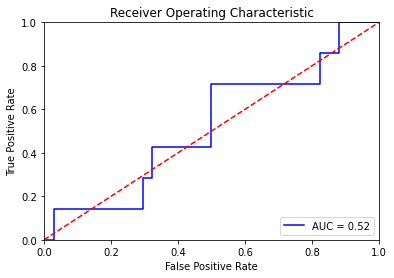

 
Duration of Training: 1.6805360317230225
 
Duration of Split: 8.54084300994873




################################################################################
Split 6
################################################################################






#######################################################
Split 6 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4654 - acc: 0.8074 - auc: 0.6237

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.6282
Negative Log-Likelihood : 0.4685


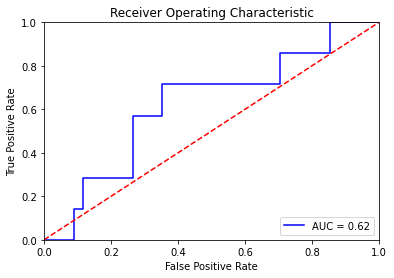

 
Duration of Training: 1.861360788345337


#######################################################
Split 6 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4626 - acc: 0.8074 - auc: 0.6295

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.6387
Negative Log-Likelihood : 0.4683


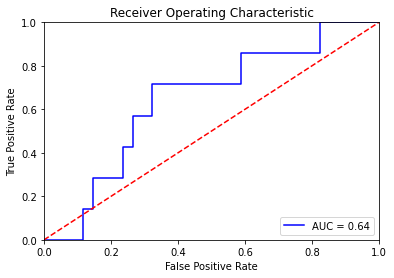

 
Duration of Training: 1.6273388862609863


#######################################################
Split 6 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5033 - acc: 0.8074 - auc: 0.5822

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9412 [0.8091 0.9837]

Area under Curve (AUC) Binary : 0.542
Area under Curve (AUC) Probability : 0.6029
Negative Log-Likelihood : 0.4957


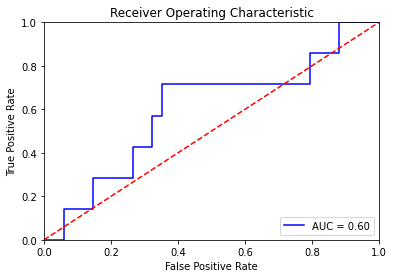

 
Duration of Training: 1.6728060245513916


#######################################################
Split 6 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 18ms/step - loss: 0.5568 - acc: 0.8016 - auc: 0.6258

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9118 [0.7704 0.9695]

Area under Curve (AUC) Binary : 0.5273
Area under Curve (AUC) Probability : 0.6239
Negative Log-Likelihood : 0.5923


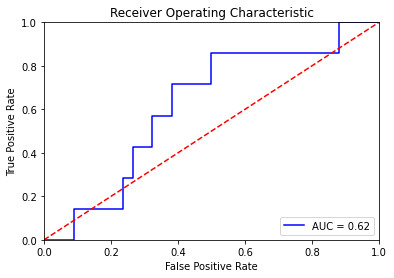

 
Duration of Training: 1.6728217601776123


#######################################################
Split 6 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5231 - acc: 0.8341 - auc: 0.5531

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.5567
Area under Curve (AUC) Probability : 0.563
Negative Log-Likelihood : 0.5235


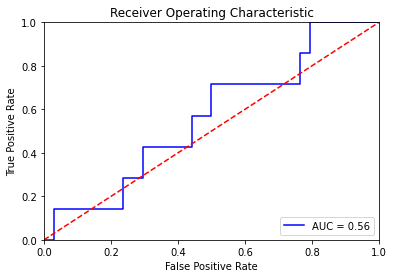

 
Duration of Training: 1.6660573482513428
 
Duration of Split: 8.653946161270142




################################################################################
Split 7
################################################################################






#######################################################
Split 7 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4955 - acc: 0.7912 - auc: 0.6278

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.2857 [0.0822 0.6411]
Specificity [95% Conf.] : 0.8824 [0.7338 0.9533]

Area under Curve (AUC) Binary : 0.584
Area under Curve (AUC) Probability : 0.6492
Negative Log-Likelihood : 0.4984


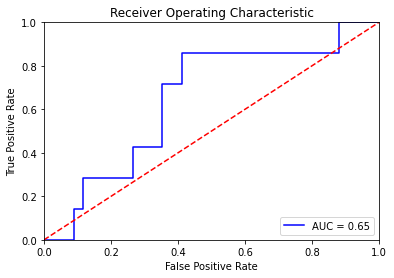

 
Duration of Training: 1.6086630821228027


#######################################################
Split 7 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4993 - acc: 0.8178 - auc: 0.5638

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9412 [0.8091 0.9837]

Area under Curve (AUC) Binary : 0.542
Area under Curve (AUC) Probability : 0.5735
Negative Log-Likelihood : 0.5022


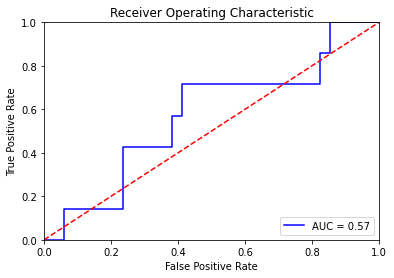

 
Duration of Training: 1.6380741596221924


#######################################################
Split 7 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 1s 19ms/step - loss: 0.4926 - acc: 0.7912 - auc: 0.6136

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9118 [0.7704 0.9695]

Area under Curve (AUC) Binary : 0.5273
Area under Curve (AUC) Probability : 0.6092
Negative Log-Likelihood : 0.5003


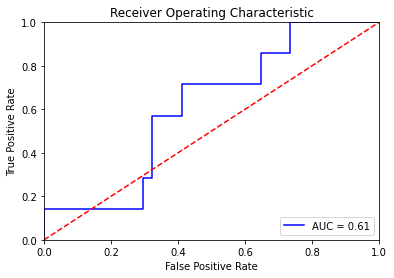

 
Duration of Training: 1.8942668437957764


#######################################################
Split 7 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4757 - acc: 0.8074 - auc: 0.5764

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.5924
Negative Log-Likelihood : 0.4763


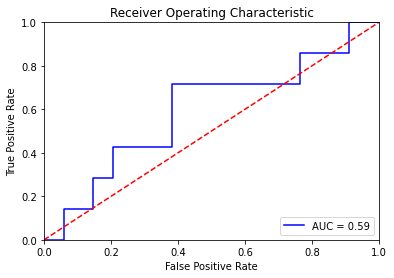

 
Duration of Training: 1.6783533096313477


#######################################################
Split 7 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 20ms/step - loss: 0.4880 - acc: 0.8341 - auc: 0.6065

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.5567
Area under Curve (AUC) Probability : 0.6134
Negative Log-Likelihood : 0.4907


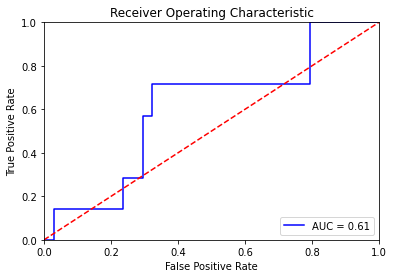

 
Duration of Training: 1.7072224617004395
 
Duration of Split: 8.669469118118286




################################################################################
Split 8
################################################################################






#######################################################
Split 8 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5138 - acc: 0.7912 - auc: 0.5944

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9118 [0.7704 0.9695]

Area under Curve (AUC) Binary : 0.5273
Area under Curve (AUC) Probability : 0.6008
Negative Log-Likelihood : 0.518


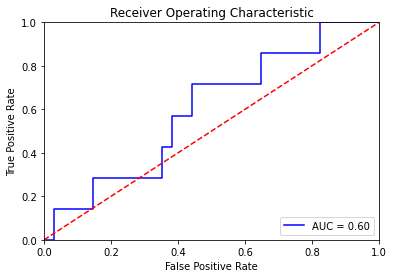

 
Duration of Training: 1.592848300933838


#######################################################
Split 8 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4698 - acc: 0.8341 - auc: 0.5804

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.5567
Area under Curve (AUC) Probability : 0.5798
Negative Log-Likelihood : 0.4762


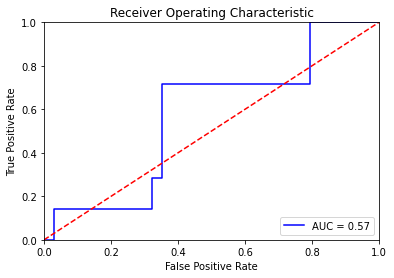

 
Duration of Training: 1.6513442993164062


#######################################################
Split 8 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 20ms/step - loss: 0.4967 - acc: 0.8341 - auc: 0.6096

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.5567
Area under Curve (AUC) Probability : 0.6218
Negative Log-Likelihood : 0.492


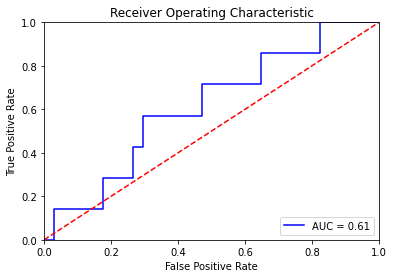

 
Duration of Training: 1.6108405590057373


#######################################################
Split 8 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4605 - acc: 0.8074 - auc: 0.6128

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary : 0.4853
Area under Curve (AUC) Probability : 0.6303
Negative Log-Likelihood : 0.4593


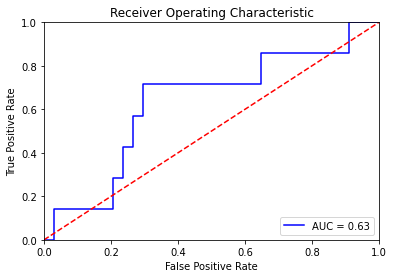

 
Duration of Training: 1.8533580303192139


#######################################################
Split 8 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.4979 - acc: 0.7912 - auc: 0.5852

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9118 [0.7704 0.9695]

Area under Curve (AUC) Binary : 0.5273
Area under Curve (AUC) Probability : 0.5945
Negative Log-Likelihood : 0.4977


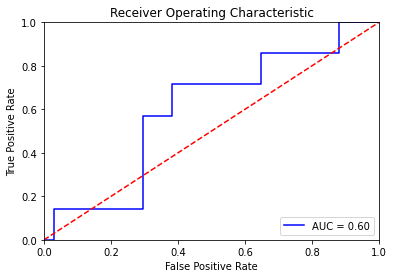

 
Duration of Training: 1.664628028869629
 
Duration of Split: 8.519391536712646




################################################################################
Split 9
################################################################################






#######################################################
Split 9 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5110 - acc: 0.7749 - auc: 0.5944

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7561 [0.6066 0.8617]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.8824 [0.7338 0.9533]

Area under Curve (AUC) Binary : 0.5126
Area under Curve (AUC) Probability : 0.6008
Negative Log-Likelihood : 0.5169


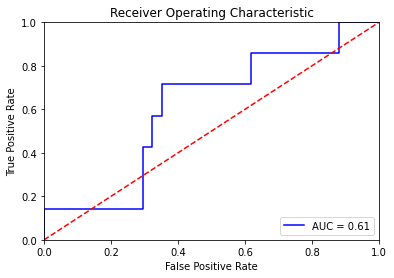

 
Duration of Training: 1.630490779876709


#######################################################
Split 9 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 18ms/step - loss: 0.5272 - acc: 0.8178 - auc: 0.5852

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9412 [0.8091 0.9837]

Area under Curve (AUC) Binary : 0.542
Area under Curve (AUC) Probability : 0.5777
Negative Log-Likelihood : 0.542


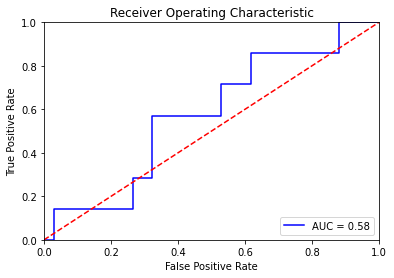

 
Duration of Training: 1.630298137664795


#######################################################
Split 9 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 19ms/step - loss: 0.5638 - acc: 0.7482 - auc: 0.5874

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7317 [0.5807 0.8431]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.8824 [0.7338 0.9533]

Area under Curve (AUC) Binary : 0.4412
Area under Curve (AUC) Probability : 0.5903
Negative Log-Likelihood : 0.5815


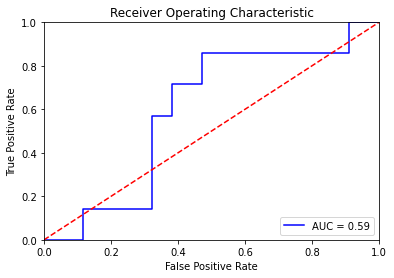

 
Duration of Training: 1.655414342880249


#######################################################
Split 9 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 20ms/step - loss: 0.5074 - acc: 0.7807 - auc: 0.6049

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.2857 [0.0822 0.6411]
Specificity [95% Conf.] : 0.8824 [0.7338 0.9533]

Area under Curve (AUC) Binary : 0.584
Area under Curve (AUC) Probability : 0.6239
Negative Log-Likelihood : 0.5014


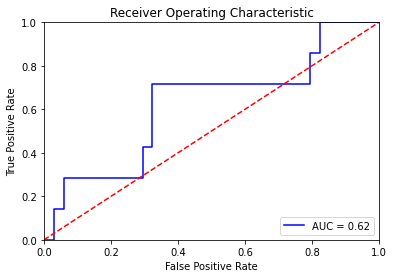

 
Duration of Training: 1.5985522270202637


#######################################################
Split 9 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')


2/2 [==============================] - 0s 20ms/step - loss: 0.5004 - acc: 0.7807 - auc: 0.5668

Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9412 [0.8091 0.9837]

Area under Curve (AUC) Binary : 0.4706
Area under Curve (AUC) Probability : 0.5798
Negative Log-Likelihood : 0.4983


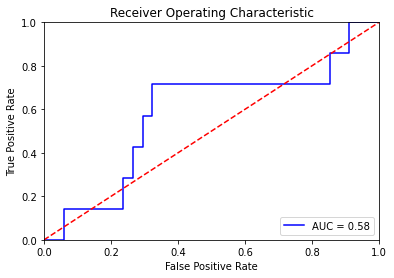

 
Duration of Training: 1.6274170875549316
 
Duration of Split: 8.286424160003662
 
Duration of Everything: 102.6634156703949


In [10]:
# loop over splits (kFold)

start0 = time.time()
for i in range(num_splits):
    start1 = time.time()
    print("\n\n\n\n################################################################################")
    print("Split " + str(i))
    print("################################################################################\n\n\n\n")
    
    (X_train, X_valid, X_test), (y_train, y_valid, y_test) = rdat.split_data(id_tab, X, i)
    
    # loop over model instances (ensembling)
    for j in range(num_models):
        start2 = time.time()
        print("\n\n#######################################################")
        print("Split " + str(i) + " Model " + str(j))
        print("#######################################################\n\n")
        
        
        model_name = ("3d_cnn_binary_model_split" + str(i) + 
                      "_unnormalized_avg_layer_paper_model_sigmoid_activation_1" + str(j) + ".h5")

        # call model
        model_3d = md.stroke_binary_3d(input_dim = input_dim,
                                       output_dim = output_dim,
                                       layer_connection = layer_connection,
                                       last_activation = last_activation)
        
        # Define data loaders.
        train_loader = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        validation_loader = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))

        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.15,
            shear_range=0.15,
            fill_mode="nearest")
        datagen.fit(X_train)

        validation_dataset = (
            validation_loader.shuffle(len(X_valid))
            .map(validation_preprocessing)
            .batch(batch_size)
            .prefetch(2)
        )

        #compile
        model_3d.compile(
            loss="binary_crossentropy",
            optimizer=keras.optimizers.Adam(learning_rate=5*1e-5),
            metrics=["acc", tf.keras.metrics.AUC(name = "auc")]
        )

        # Define callbacks.
        # checkpoint_cb = keras.callbacks.ModelCheckpoint(
        #     OUTPUT_DIR + model_name, 
        #     save_best_only=True
        # )
        checkpoint_cb = keras.callbacks.ModelCheckpoint(
            filepath = OUTPUT_DIR + "epochs/" + model_name,
            verbose = 1,
            save_weights_only = True,
            monitor = "val_loss", #'val_acc',
            mode = 'min',
            save_best_only = True)

        early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_loss", patience=100, restore_best_weights=True)
        
        
        # Train the model, doing validation at the end of each epoch
        if train:
            hist = model_3d.fit(
                datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
                validation_data=validation_dataset,
                epochs=epochs,
                shuffle=True,
                verbose=0,
                callbacks=[checkpoint_cb, early_stopping_cb]
        ) 
            
        if train:
            plt.figure(figsize = (30,10))
            plt.subplot(1,3,1)
            plt.plot(hist.history['loss'], label = "loss")
            plt.plot(hist.history['val_loss'],label = "val_loss")
            plt.legend()
            plt.subplot(1,3,2)
            plt.plot(hist.history['acc'], label = "acc")
            plt.plot(hist.history['val_acc'],label = "val_acc")
            plt.legend()
            plt.subplot(1,3,3)
            plt.plot(hist.history['auc'], label = "auc")
            plt.plot(hist.history['val_auc'],label = "val_auc")
            plt.legend()
            plt.show()
            
            
        # Model evaluation
        if not train:
            model_3d.load_weights(OUTPUT_DIR + model_name)
        if train:
            model_3d.load_weights(OUTPUT_DIR + "epochs/" + model_name)

        model_3d.evaluate(x=X_test, y=y_test)
        
        
        hlp.bin_class_report(X_test, 
                 y_test, 
                 model = model_3d)
        
        y_pred = model_3d.predict(X_test)

        fpr, tpr, threshold = metrics.roc_curve(y_test, (y_pred))
        roc_auc = metrics.auc(fpr, tpr)

        # method I: plt
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
        test_auc.apend(roc_auc)
        test_nll.apend()
        test_sens.apend()
        test_spez.apend()
        
        end2 = time.time()
        print(" ")   
        print("Duration of Training: " + str(end2-start2))  
        
    end1 = time.time()
    print(" ")   
    print("Duration of Split: " + str(end1-start1))  
        
end0 = time.time()
print(" ")   
print("Duration of Everything: " + str(end0-start0))  